In [170]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table
#not used today but lets check you have them
import pandas

ModuleNotFoundError: No module named 'pandas'

## Explore a (very) small set of eBOSS data. 

eBOSS data is located in what is called spPlates files.  For a full description of the spPlates look 
https://data.sdss.org/datamodel/files/BOSS_SPECTRO_REDUX/RUN2D/PLATE4/spPlate.html  

Lets download one of this files. 

In [127]:
url_file='https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3587/spPlate-3587-55182.fits'
plates_local='./spPlates/'
plate_file='spPlate-3588-55184.fits'
if not os.path.exists(plates_local):
        os.makedirs(plates_local)

local_file=plates_local+plate_file
if not os.path.exists(local_file):
    print("downloading spplate from %s to %s"
              % (url_file, local_file))
    tmp = urllib.request.urlretrieve(url_file, local_file)
else:
    print('%s  %s present on disk. '%(url_file,local_file))



https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3587/spPlate-3587-55182.fits  ./spPlates/spPlate-3588-55184.fits present on disk. 


In [128]:
#Explore the file we've just downloaded
file=plates_local+plate_file
plate1=pyfits.open(file)

In [129]:
#print infofile. Check out http://docs.astropy.org/en/stable/io/fits/
plate1.info()

Filename: ./spPlates/spPlate-3588-55184.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     229   (4647, 1000)   float32   
  1  IVAR          1 ImageHDU        16   (4647, 1000)   float32   
  2  ANDMASK       1 ImageHDU        15   (4647, 1000)   int32   
  3  ORMASK        1 ImageHDU        15   (4647, 1000)   int32   
  4  WAVEDISP      1 ImageHDU        16   (4647, 1000)   float32   
  5  PLUGMAP       1 BinTableHDU     88   1000R x 35C   [5J, 6A, D, D, 5E, E, E, E, 16A, D, D, J, J, J, J, J, J, E, 21A, E, E, J, K, K, K, K, J, 4A, J, J, J, 5E, 5E, 5J, E]   
  6  SKY           1 ImageHDU         8   (4647, 1000)   float32   


In [130]:
#What is in the PLUGMAP?
plugmap=plate1['PLUGMAP'].data
Table(plugmap)

OBJID [5],HOLETYPE,RA,DEC,MAG [5],STARL,EXPL,DEVAUCL,OBJTYPE,XFOCAL,YFOCAL,SPECTROGRAPHID,FIBERID,THROUGHPUT,PRIMTARGET,SECTARGET,OFFSETID,SCI_EXPTIME,SOURCETYPE,LAMBDA_EFF,ZOFFSET,BLUEFIBER,BOSS_TARGET1,BOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,RUN,RERUN,CAMCOL,FIELD,ID,CALIBFLUX [5],CALIBFLUX_IVAR [5],CALIB_STATUS [5],SFD_EBV
int32,str6,float64,float64,float32,float32,float32,float32,str16,float64,float64,int32,int32,int32,int32,int32,int32,float32,str21,float32,float32,int32,int64,int64,int64,int64,int32,str4,int32,int32,int32,float32,float32,int32,float32
2728 .. 124,OBJECT,11.382137999999998,-0.028145161,23.1102 .. 18.8796,0.0,0.0,0.0,GALAXY,301.32296,-6.1338778,1,1,32026,0,0,1,0.0,LRG,5400.0,0.0,0,9,0,0,0,2728,301,3,489,124,1.1782539 .. 58.678192,5.320078 .. 0.20767432,24577 .. 24577,0.015352863
0 .. 0,OBJECT,11.480943000000025,-0.1143519,26.572 .. 21.939,0.0,0.0,0.0,NA,323.06207,-24.943743,1,2,36757,0,0,1,0.0,QSO_GRI,5400.0,0.0,1,0,0,536870912,0,0,,0,0,0,0.30778626 .. 1.4333534,15.011751 .. 1.1993102,24577 .. 24577,0.016157152
4263 .. 485,OBJECT,11.410420999999985,-0.28305497,24.1479 .. 20.822,0.0,0.0,0.0,GALAXY,307.58125,-61.727048,1,3,36676,0,0,1,0.0,LRG,5400.0,0.0,0,6,0,0,0,4263,301,3,192,485,0.28030014 .. 9.6534,9.12571 .. 0.36943063,24577 .. 24577,0.017159209
2728 .. 165,OBJECT,11.413002000000006,-0.06723294,22.4935 .. 21.353,0.0,0.0,0.0,QSO,308.10264,-14.630038,1,4,30125,0,0,1,0.0,QSO,4000.0,0.0,1,65536,0,0,0,2728,301,3,489,165,2.093434 .. 4.789381,17.604595 .. 1.7493329,24577 .. 24577,0.015407031
2728 .. 350,OBJECT,11.370152000000019,-0.042618017,23.824 .. 20.9157,0.0,0.0,0.0,GALAXY,298.6931,-9.288649,1,5,39729,0,0,1,0.0,LRG,5400.0,0.0,0,6,0,0,0,2728,301,3,489,350,0.4969688 .. 8.739886,6.0304847 .. 0.33227256,24577 .. 24577,0.01523817
0 .. 0,OBJECT,11.350979999999993,0.038246182,0.0 .. 0.0,0.0,0.0,0.0,SKY,294.4878,8.3391139,1,6,30231,0,0,1,0.0,NA,5400.0,0.0,1,0,0,0,0,0,,0,0,0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0.014600264
2728 .. 611,OBJECT,11.457323999999971,-0.067333797,24.1476 .. 20.8979,0.0,0.0,0.0,GALAXY,317.85281,-14.68401,1,7,33974,0,0,1,0.0,LRG,5400.0,0.0,0,14,0,0,0,2728,301,3,489,611,0.2812808 .. 8.899108,6.235111 .. 0.316698,24577 .. 24577,0.016051836
4263 .. 249,OBJECT,11.308869000000016,-0.33872519,22.3747 .. 21.0934,0.0,0.0,0.0,QSO,285.30313,-73.804892,1,8,34094,0,0,1,0.0,QSO,4000.0,0.0,1,218112,0,0,0,4263,301,3,191,249,2.4854016 .. 6.269193,26.228327 .. 2.2249532,24577 .. 24577,0.0151739605
2728 .. 550,OBJECT,11.438775000000021,-0.01381775,23.4368 .. 20.9568,0.0,0.0,0.0,GALAXY,313.76776,-3.0111716,1,9,34845,0,0,1,0.0,LRG,5400.0,0.0,0,6,0,0,0,2728,301,3,489,550,0.81547946 .. 8.444346,5.949246 .. 0.3295001,24577 .. 24577,0.016044602


In [6]:
plugmap.columns

ColDefs(
    name = 'OBJID'; format = '5J'
    name = 'HOLETYPE'; format = '6A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'MAG'; format = '5E'
    name = 'STARL'; format = 'E'
    name = 'EXPL'; format = 'E'
    name = 'DEVAUCL'; format = 'E'
    name = 'OBJTYPE'; format = '16A'
    name = 'XFOCAL'; format = 'D'
    name = 'YFOCAL'; format = 'D'
    name = 'SPECTROGRAPHID'; format = 'J'
    name = 'FIBERID'; format = 'J'
    name = 'THROUGHPUT'; format = 'J'
    name = 'PRIMTARGET'; format = 'J'
    name = 'SECTARGET'; format = 'J'
    name = 'OFFSETID'; format = 'J'
    name = 'SCI_EXPTIME'; format = 'E'
    name = 'SOURCETYPE'; format = '21A'
    name = 'LAMBDA_EFF'; format = 'E'
    name = 'ZOFFSET'; format = 'E'
    name = 'BLUEFIBER'; format = 'J'
    name = 'BOSS_TARGET1'; format = 'K'
    name = 'BOSS_TARGET2'; format = 'K'
    name = 'ANCILLARY_TARGET1'; format = 'K'
    name = 'ANCILLARY_TARGET2'; format = 'K'
    name = 'RUN'; format = 'J'
    na

In [7]:
#As you can see an spPlate has different types of objects. Which types? 
print(np.unique(plugmap['OBJTYPE']))

['GALAXY' 'NA' 'QSO' 'SKY' 'SPECTROPHOTO_STD']


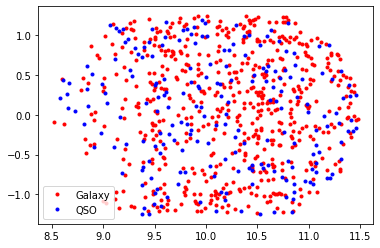

In [139]:
#Lets look at the distribution of Galaxies in the sky. 
wg=plugmap['OBJTYPE']=='GALAXY'
wq=plugmap['OBJTYPE']=='QSO'
plt.plot(plugmap['RA'][wg],plugmap['DEC'][wg],'.',color='r',label='Galaxy')
plt.plot(plugmap['RA'][wq],plugmap['DEC'][wq],'.',color='b',label='QSO')
plt.legend()

In [141]:
print(len(plugmap['RA'][wg]))
print(len(plugmap['RA'][wq]))

568
210


So far so good, but haven't seen how the spectra looks like. So lets get the observed flux.

The wavelenght is given by the parameters 'COEFF0' and 'COEFF1' present in the header of the first hdu of the spPlate file, while the flux is an array in the same hdu.

In [147]:
#Get the wavelenght
pltheader=plate1[0].header
coeff0=pltheader['COEFF0']
coeff1=pltheader['COEFF1']
objtype=plugmap['OBJTYPE']
fiberid_pm=plugmap['FIBERID']
flux=plate1[0].data
ivar=plate1[1].data

logwave=coeff0+coeff1*np.arange(flux.shape[1])



Lets look at what we got. 

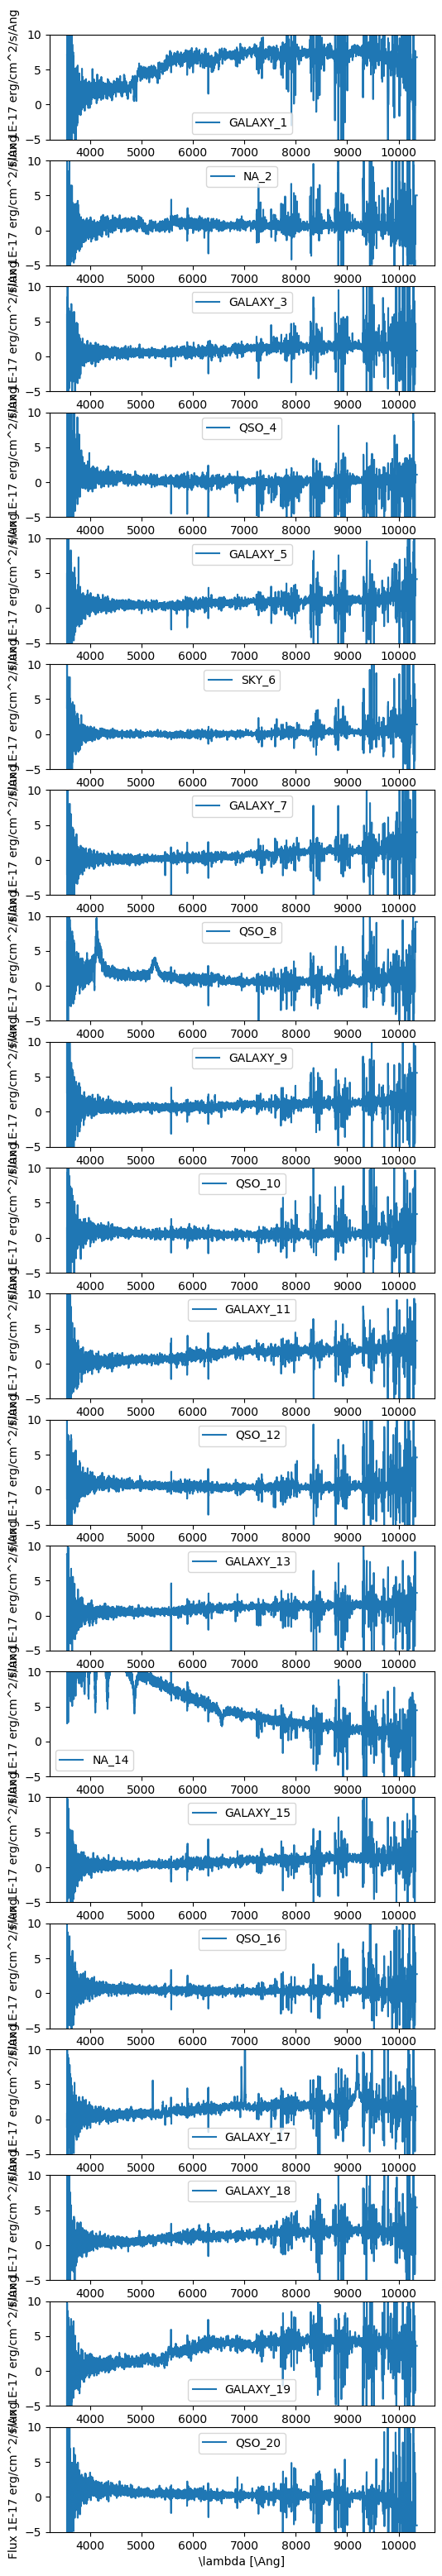

In [13]:
#Plot some of the specta
plt.figure(figsize=(6,40),dpi=100)
i=0
for i in range(20):
    plt.subplot(20,1,i+1)
    plt.plot(10**logwave,flux[fiberid_pm[i]-1],label=objtype[i]+'_'+str(fiberid_pm[i]))
   # print(ids_[i],zqso_[i])
    plt.ylabel('Flux 1E-17 erg/cm^2/s/Ang')
    plt.xlabel('\lambda [\Ang]')
    plt.ylim(-5,10)
    plt.legend()


In [149]:
fiberid_qso=fiberid_pm[wq]

3
7
9
11
15
19
21
23
27
29
33
35
37
41
45
47
49
51
53
55


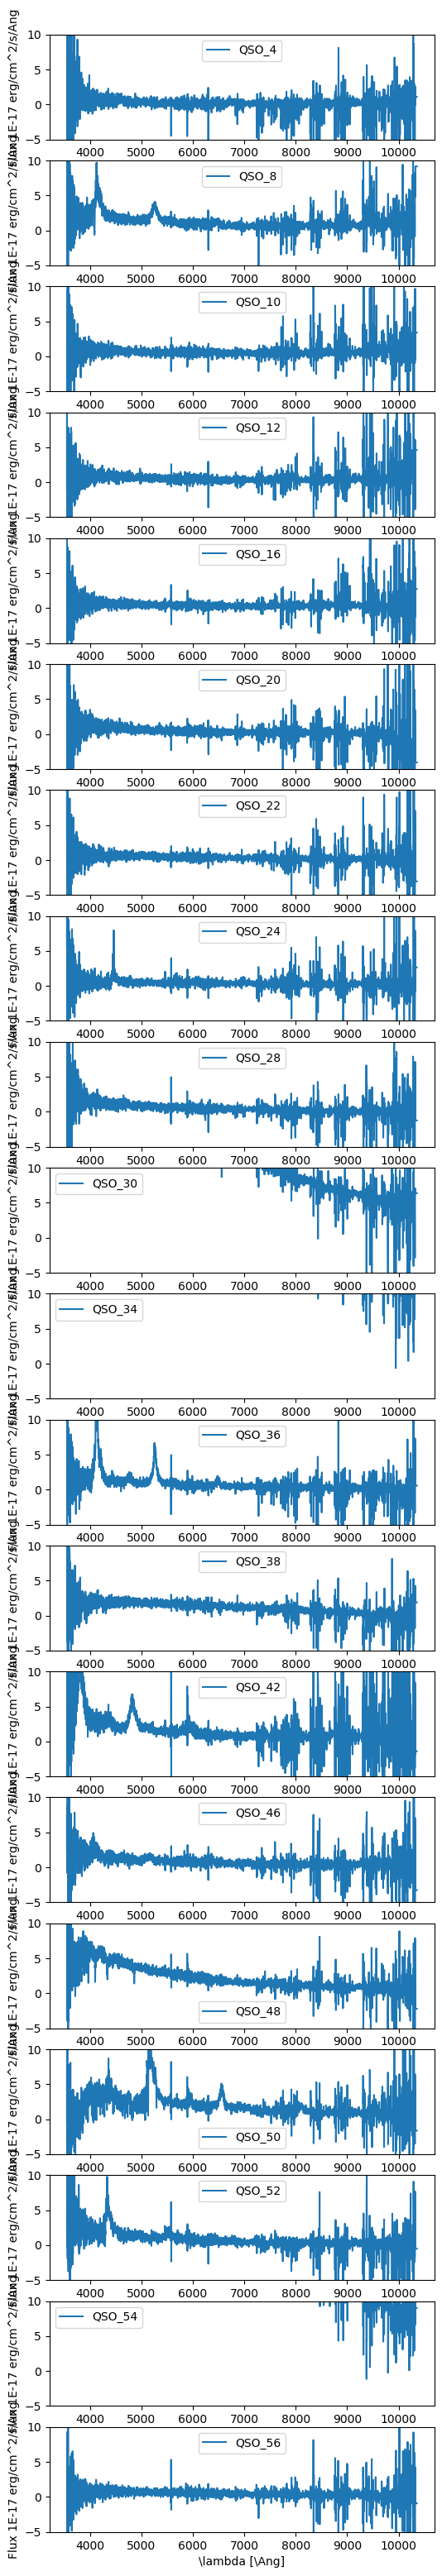

In [155]:
#Plot some of the specta
plt.figure(figsize=(6,40),dpi=100)
i=0
for i in range(20):
    plt.subplot(20,1,i+1)
    plt.plot(10**logwave,flux[fiberid_qso[i]-1],label=objtype[fiberid_qso[i]-1]+'_'+str(fiberid_qso[i]))
    print(fiberid_qso[i]-1)
    plt.ylabel('Flux 1E-17 erg/cm^2/s/Ang')
    plt.xlabel('\lambda [\Ang]')
    plt.ylim(-5,10)
    plt.legend()

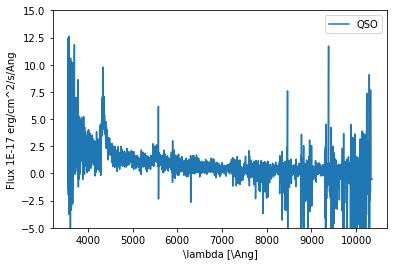

In [158]:
#There is an interesting object in number 13th. Lets look at it in more detail
plt.plot(10**logwave,flux[51],label=objtype[51])
plt.ylabel('Flux 1E-17 erg/cm^2/s/Ang')
plt.xlabel('\lambda [\Ang]')
plt.ylim(-5,15)
#plt.xlim(3500,5000)
plt.legend()
i+=1

#We are only interested in the lyman alpha forest that is the region between 1040 and 1200. 
wforest=(10**logwave/(1+zvi)>1040)&(10**logwave/(1+zvi)<1200)
print(wforest.any==True)
lwforest=logwave[wforest]
flforest=flux[fiberid_qso[53]-1]
plt.plot(10**lwforest/(1+zvi),flforest[wforest],label='forest')
plt.ylabel('Flux 1E-17 erg/cm^2/s/Ang')
plt.xlabel('\lambda [\Ang]')
plt.ylim(-5,20)
plt.xlim(1040,1200)
plt.legend()
i+=1

In [161]:
#So we think the true redshift of the quasar is 2.24. Lets find out if we are right,
# by looking at the oficial DR14 qso catalog
DATA_URL="https://data.sdss.org/sas/dr14/eboss/qso/DR14Q/"
file="DR14Q_v4_4.fits"
local_dir="./"
local_file = os.path.join(local_dir,file)
if not os.path.exists(file):
        print("downloading DR14 quasar dataset from %s to %s"
              % (DATA_URL+file, local_file ))
        tmp = urllib.request.urlretrieve(DATA_URL+local_file, local_file)
        print ("Downloaded file"+local_file)
else:
    print("%s already exist"%(local_file))



./DR14Q_v4_4.fits already exist


In [160]:
catalog=Table.read('DR14Q_v4_4.fits')
cat=catalog[(catalog['MJD']==55184) & (catalog['PLATE']==3588)]
cat.sort('PLATE')
fiberid_cat=cat['FIBERID']

In [162]:
catalog

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE [51],MJD_DUPLICATE [51],FIBERID_DUPLICATE [51],SPECTRO_DUPLICATE [51],BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],MI,GAL_EXT [5],RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32,int32,int32,bytes1,float64,float64,int16,bytes1,int16,int16,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
000000.45+174625.4,0.001898274356335605,17.773739123771385,268270422,7596,56945,162,BOSS,2.309,0.0,VI,2.309000015258789,2.307750701904297,0.0010300044668838382,0,2.3045657000000004,-1.0,-1.0,0,0,0,0,4096,0,0,1,1,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.0379366874694824 .. 2.631136417388916,12.372532844543457 .. 0.8706143498420715,22.440338134765625 .. 21.372461318969727,0.2871243953704834 .. 0.38545534014701843,-24.410782,0.12021728605031967 .. 0.03581845760345459,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.30231887102127075,8.785573140381722,0.7275648713111877,4.537358964921044,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1.0,-1.0,-1.0
000000.57+055630.8,0.0023754761888312714,5.941903005523435,163544156,8740,57367,694,BOSS,2.1031202999999996,0.0,AUTO,-1.0,2.1031203269958496,0.0009241577354259787,0,2.0996384999999997,2.0983490000000002,2.0983490000000002,0,0,0,0,2048,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.1197296380996704 .. 4.730101585388184,9.196866035461426 .. 0.8192309737205505,22.360628128051758 .. 20.78717613220215,0.3101848363876343 .. 0.2420300394296646,-24.732,0.2338263988494873 .. 0.06966802477836609,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.0,0.0,0.0,0.0,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,16.969,0.127,8.5,0.9904,16.887999999999998,0.409,2.700000047683716,1.004,11.861,nan,1.399999976158142,0.9819,8.604,0.127,0.699999988079071,0.9478,hH00,BCUU,0.706171,1.0,1.2885136657753169e-31,2.4790984841010035e-32,1.229889058862803e-31,4.504542253745802e-32,1.496424644649041e-31,4.7290496259357616

In [81]:
fbid_incat=fiberid_qso[np.in1d(fiberid_qso,fiberid_cat)]

In [163]:
cat

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE [51],MJD_DUPLICATE [51],FIBERID_DUPLICATE [51],SPECTRO_DUPLICATE [51],BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],MI,GAL_EXT [5],RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32,int32,int32,bytes1,float64,float64,int16,bytes1,int16,int16,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
003426.23+002602.0,8.609296564138617,0.4338955257437757,106534928,3588,55184,510,BOSS,3.23,0.0,VI,3.2300000190734863,3.23108983039856,0.0006336775841191411,0,3.2148204,-1.0,-1.0,201728,0,0,0,0,0,1,1,2,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,0.02617514133453369 .. 7.913082122802734,44.65258026123047 .. 2.459162473678589,24.533329010009766 .. 20.244762420654297,0.5777681469917297 .. 0.08600404113531113,-26.673836,0.10057845711708069 .. 0.029967114329338074,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.04302794486284256,100.18372589635844,-0.022092310711741447,562.9884013675153,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,17.000999999999998,0.13,8.399999618530273,0.9504,16.099,0.219,5.0,0.9708,11.892,nan,1.100000023841858,0.8599,8.338,0.13,1.0,0.9139,0000,BBUU,0.856248,1.0,3.1930524341640286e-31,3.2466854218652116e-32,2.9909527467124658e-31,5.123221093630894e-32,3.3336638929150407e-31,5.434809968950535e-32,3.535358034815571e-31,5.869725246339519e-32,0,-1.0,-1.0,-1.0
003954.01+005737.5,9.975042169771145,0.9604300458760444,115829197,3588,55184,756,BOSS,0.68,0.0,VI,0.6800000071525574,0.6795452237129211,0.00016895026783458889,0,0.68120503,0.67971057,0.67971057,0,2048,0,0,0,0,0,2,2,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,2.1187846660614014 .. 9.253254890441895,20.540164947509766 .. 1.3700501918792725,21.680072784423828 .. 20.07738494873047,0.11209236085414886 .. 0.09898658841848373,-22.962467,0.08748368918895721 .. 0.026065560057759285,0.0,0.0,-1.0,6.142530000000001e-14,4.31837e-15,5.415880000000002e-14,1.7828389999999995e-14,1.16362e-13,1.52443e-14,2.4717246844170404e+44,0.28282333016635425,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan

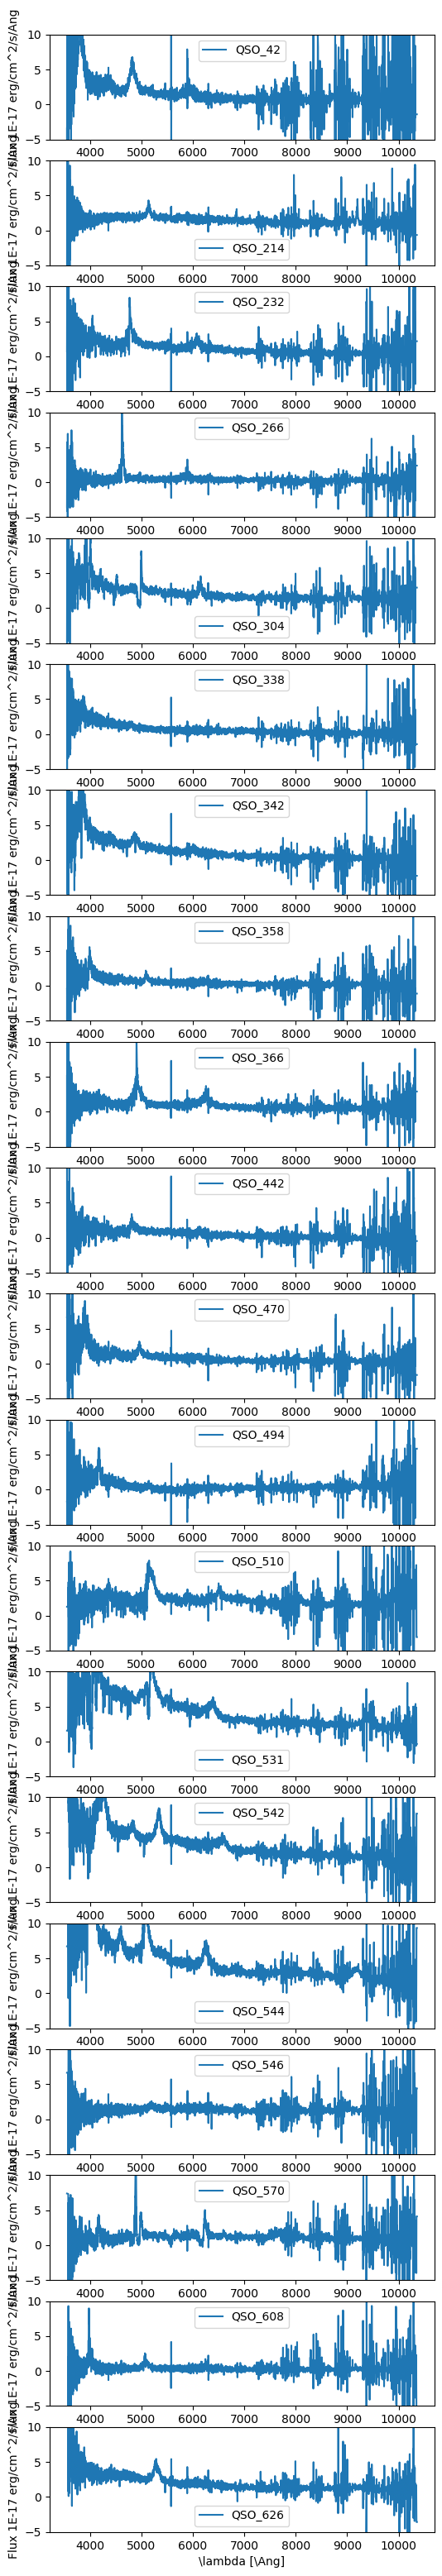

In [82]:
#Plot some of the specta
plt.figure(figsize=(6,40),dpi=100)
i=0
for i in range(20):
    plt.subplot(20,1,i+1)
    plt.plot(10**logwave,flux[fbid_incat[i]-1],label=objtype[fbid_incat[i]-1]+'_'+str(fbid_incat[i]))
    plt.ylabel('Flux 1E-17 erg/cm^2/s/Ang')
    plt.xlabel('\lambda [\Ang]')
    plt.ylim(-5,10)
    plt.legend()

No handles with labels found to put in legend.


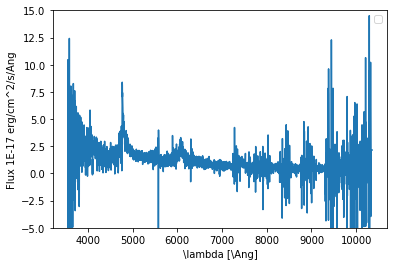

In [164]:
#There is an interesting object in number 231th. Lets look at it in more detail... It is a lyman alpha quasar. Lyman 
#alpha has an emission line at 121.6nm (restframe), lets find what is thhe 
plt.plot(10**logwave,flux[231])
plt.ylabel('Flux 1E-17 erg/cm^2/s/Ang')
plt.xlabel('\lambda [\Ang]')
plt.ylim(-5,15)
#plt.xlim(3300,5000)
#plt.axvline(1216)
plt.legend()

No handles with labels found to put in legend.


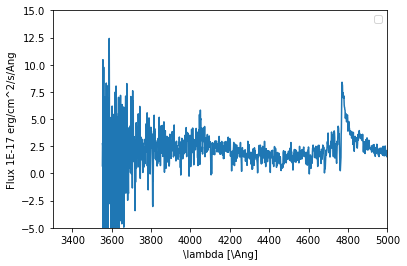

In [98]:
#There is an interesting object in number 231th. Lets look at it in more detail... It is a lyman alpha quasar. Lyman 
#alpha has an emission line at 121.6nm (restframe), lets find what is thhe 
plt.plot(10**logwave,flux[231])
plt.ylabel('Flux 1E-17 erg/cm^2/s/Ang')
plt.xlabel('\lambda [\Ang]')
plt.ylim(-5,15)
plt.xlim(3300,5000)
plt.axvline(1216)
plt.legend()


No handles with labels found to put in legend.


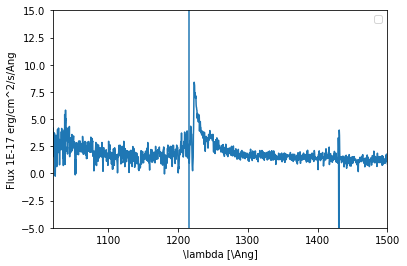

In [168]:
zvi=2.9
#There is an interesting object in number 231th. Lets look at it in more detail... It is a lyman alpha quasar. Lyman 
#alpha has an emission line at 121.6nm (restframe), lets find what is thhe 
plt.plot(10**logwave/(1+zvi),flux[231])
plt.ylabel('Flux 1E-17 erg/cm^2/s/Ang')
plt.xlabel('\lambda [\Ang]')
plt.ylim(-5,15)
plt.xlim(1020,1500)
plt.axvline(1216)
plt.legend()

2.9225313661120196


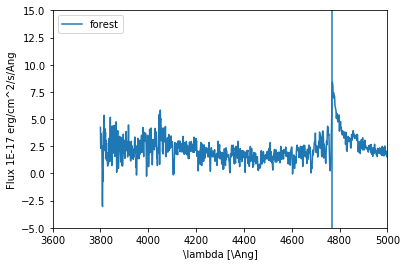

In [169]:
wlya=(10**logwave>3800)&(10**logwave<5000)
lwlya=logwave[wlya]
fllya=flux[231][wlya]
llya=10**lwlya[np.argmax(fllya)]
z=llya/1216-1.
print(z)
plt.plot(10**lwlya,fllya,label='forest')
plt.axvline(llya)
plt.ylabel('Flux 1E-17 erg/cm^2/s/Ang')
plt.xlabel('\lambda [\Ang]')
plt.ylim(-5,15)
plt.xlim(3600,5000)
plt.legend()


In [74]:
#What is the actual redshift? 

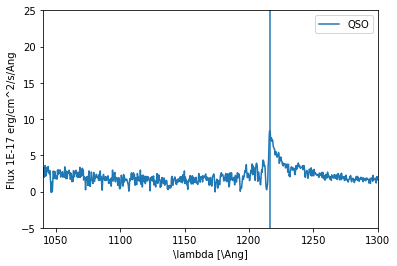

In [121]:
#Make the same plot in the restframe
plt.plot(10**logwave/(1+z),flux[231],label=objtype[231])
plt.ylabel('Flux 1E-17 erg/cm^2/s/Ang')
plt.xlabel('\lambda [\Ang]')
plt.ylim(-5,25)
plt.xlim(1040,1300)
plt.axvline(1216)
plt.legend()
i+=1

In [125]:
Table(cat[cat['FIBERID']==232])

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE [51],MJD_DUPLICATE [51],FIBERID_DUPLICATE [51],SPECTRO_DUPLICATE [51],BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],MI,GAL_EXT [5],RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32,int32,int32,bytes1,float64,float64,int16,bytes1,int16,int16,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
004114.12-001153.4,10.308846983663273,-0.19817204251974505,94641794,3588,55184,232,BOSS,2.935,0.0,VI,2.934999942779541,2.9352378845214844,0.0004587887087836861,0,2.9219592,-1.0,-1.0,214016,0,0,0,0,0,0,1,1,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,0.5327765941619873 .. 5.234807968139648,18.2951602935791 .. 1.3820213079452515,23.115421295166016 .. 20.68167495727539,0.42174649238586426 .. 0.16977272927761078,-26.049374,0.07205183804035187 .. 0.021467674523591995,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.0052972249686718,17.684126534689184,-0.12126848846673965,370.497838674265,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,,nan,1.0,1.4758801772314149e-31,2.6099230707606555e-32,1.4950568394224242e-31,3.4861333272541244e-32,1.6819582077639016e-31,4.083520144089186e-32,5.727573302241755e-32,5.323862110142524e-32,0,-1.0,-1.0,-1.0


Now that we found the redshift for one spectra, can you do it for all the spectra that are both in the spPlate and the catalog? and quantify how well you do in finding redshifts?